In [172]:
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt;
import matplotlib;
from pandas.plotting import scatter_matrix;
import seaborn as sns;
%matplotlib inline

In [173]:
sns.set(style="white",font_scale=1.5,color_codes=True)

In [174]:
train=pd.read_csv("train.csv")
train=train.iloc[:,0:12]
train.shape

(891, 12)

In [175]:
train.Survived.value_counts()#no of passengers who have survived and not survived

0.0    549
1.0    342
Name: Survived, dtype: int64

In [176]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [177]:
train.Sex.value_counts()#sex distribuiton in the titanic

male      577
female    314
Name: Sex, dtype: int64

In [178]:
train.Embarked.value_counts()#shows the no of people who boarded from this particular cities

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [179]:
train.isnull().sum()#we drop irrelevant columns like the cabin and body completely along with lifeboat that has nothing to do with our prediction
#we keep the age cuz its required and perform EDA on it!

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [180]:
train["Age"]=train["Age"].fillna(train["Age"].mean())

In [181]:
#dropping the irrelevant data from our dataset
train=train.drop(["PassengerId","Cabin","Ticket","Name"],axis=1)

In [182]:
train["Survived"]=train["Survived"].astype(int)

In [183]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [184]:
train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [185]:
train.dropna(inplace=True)
train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [186]:
train.dtypes

Survived      int32
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [187]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [188]:
#now we map the categorical data!
train_one_hot=pd.get_dummies(train,columns=["Sex","Embarked"])

In [189]:
train_one_hot.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


<AxesSubplot:>

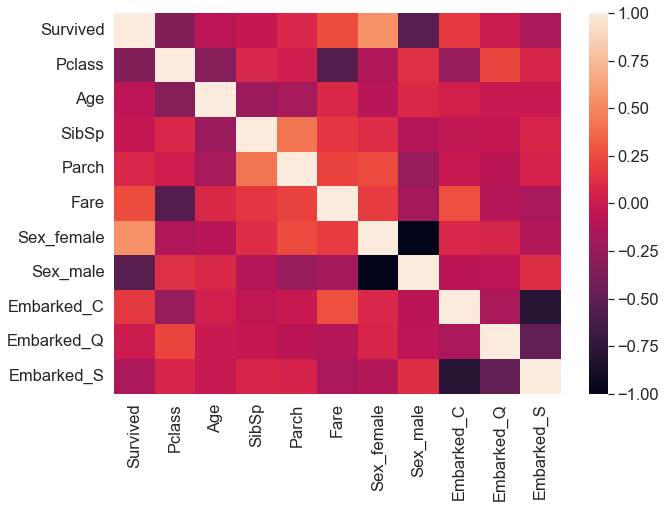

In [190]:
#to find whether the variables are correlated we use a heatmap from urs truly SNS!
plt.figure(figsize=(10,7))
sns.heatmap(train_one_hot.corr())

In [191]:
X=train_one_hot.drop(["Survived"],axis=1).values
Y=train_one_hot["Survived"].values

In [192]:
from sklearn.model_selection import train_test_split;
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [193]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((666, 10), (666,), (223, 10), (223,))

In [194]:
from sklearn.linear_model import LogisticRegression;
clf=LogisticRegression(max_iter=10000).fit(x_train,y_train)
clf.score(x_test,y_test)

0.7847533632286996

In [195]:
clf.score(x_train,y_train)

0.8018018018018018

In [196]:
y_pred=clf.predict(x_test)

In [197]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report;
accuracy_score(y_test,y_pred)

0.7847533632286996

In [198]:
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.85      0.79      0.82       141
           1       0.68      0.77      0.72        82

    accuracy                           0.78       223
   macro avg       0.77      0.78      0.77       223
weighted avg       0.79      0.78      0.79       223



In [199]:
clf.coef_

array([[-1.0810075 , -0.04288565, -0.41966777, -0.07386602,  0.00193853,
         1.37172664, -1.36958648,  0.27113255, -0.00274536, -0.26624703]])

In [200]:
clf.intercept_

array([3.93348459])